First we import the necessary libraries and modules.


1.   *numpy*  (for multidimensional calculations)
1.   *pandas* (for easy data structuring and visualization)
2.   *sklearn.datasets* (data) 
3.   *train_test_split* (a function that help you to split datasets )
4.   *classification_report* (generate performance report of your prediction) 



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
iris = load_iris()

# let's print out first 10 items in iris['data'] to see what's inside
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [ ]:
# let's print out first 10 items in iris['target'] 
print(iris['target'][:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names']+['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# describe the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Now let's mess with the dataset , split it into two sets : training , testing.

# Overfitting in machine learning

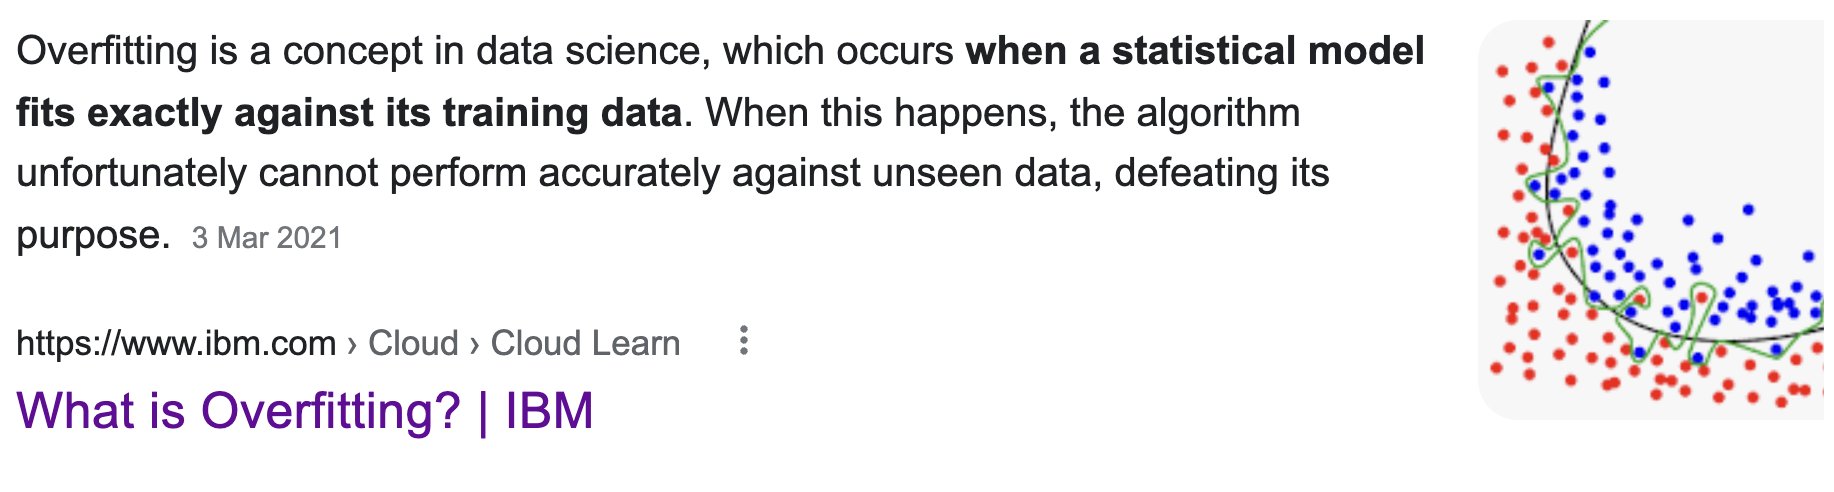

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. **bold text**

It is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test

In [ ]:
X = iris.data
y = iris.target

# Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

print(type(X))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[1])

<class 'numpy.ndarray'>
(120, 4)
(30, 4)
(120,)
(30,)
[6.5 3.  5.5 1.8]


# Let implement our own KNN algorithm

In [ ]:
class KNNClassifier:

    def __init__(self, X_train, y_train, n_neighbors = 3):
        self.n_neighbors = n_neighbors
        self._X_train = X_train
        self._y_train = y_train

    """calculate the euclidean distance here"""
    def euclidean_dist(self, point_1, point_2):
        distance = 0
        # loop through dimenion of 
        for i in range(len(point_1)):
          a = point_1[i]
          b = point_2[i]
          d_square = (a-b)**2
          distance +=d_square
        return np.sqrt(distance)

        

    """accept multiple inputs here and predict one by one with predict_single()"""
    def predict(self, X_test_array):
      y = []
      for x in X_test_array:
        y.append(self.predict_single(x)) 
      return y

    """predict single input here"""
    def predict_single(self, input_data_single):
        distance_table = []
        # put in the train data for comparing distance
        for i in range(len(self._X_train)):
          x = self._X_train[i]
          y = self._y_train[i]
          #calling hte euclidean function
          distance = self.euclidean_dist(input_data_single, x)
          distance_table.append([distance,y])
        
        #sort the list according to the distance,with the closest first
        distance_table = sorted(distance_table,key = lambda item: item[0])
        
        #list
        neighborhood = []

        #select K nearest neighbors 
        for i in range(self.n_neighbors):
          neighborhood.append(distance_table[i])
        
        #dictionary
        classification_table  = {}
        #count the point's nearest K neighbors classes' amount and store in table
        for i in range(self.n_neighbors):
          classification = neighborhood[i][1]
          if classification in classification_table:
            classification_table[classification] += 1
          else:
            classification_table[classification] = 1

      
        #sort the classification count from high to low
        classification_table = sorted(classification_table.items(),key = lambda item:item[1],reverse = True)

        return classification_table[0][0]
          



Let's use the classifer and evaluate the result!

In [ ]:
iris_knn_classifier = KNNClassifier(X_train, y_train, 3)
y_pred = iris_knn_classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=[
      'Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']))

                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00         8
Iris-Versicolour       0.92      0.92      0.92        12
  Iris-Virginica       0.90      0.90      0.90        10

        accuracy                           0.93        30
       macro avg       0.94      0.94      0.94        30
    weighted avg       0.93      0.93      0.93        30

